In [1]:
# Some calculation for the LHF coupling and separation across spatial scales.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
import sys; sys.path.insert(1, '/home/alessandro/thesis_material/EURECA_scripts')
import geometry as gm
import warnings; warnings.filterwarnings("ignore")

In [2]:
def local_variance(field,sigma):
    bar = gm.nan_gaussian_filter(field**2,sigma)
    return bar

def local_covariance(field_a,field_b,sigma):
    bar = gm.nan_gaussian_filter(field_a*field_b,sigma)
    return bar

In [3]:
from scipy.stats import linregress

def density_scatter(x,y,xlabel,ylabel, minititle):
    fig = plt.figure(figsize=(8,5))
    
    x,y = x[(~np.isnan(x))&(~np.isnan(y))], y[(~np.isnan(x))&(~np.isnan(y))]
    hb = plt.hexbin(x, y, mincnt=1, gridsize=100, bins='log', cmap='inferno')
    cb = plt.colorbar(hb, label='counts')
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.grid()
    
    lr_out = linregress(x,y)
    print(lr_out[1])
    plt.title(f'r={lr_out[2]:.2f}, s={lr_out[0]:.4f} (pval={lr_out[3]:.2}) ' + minititle)
    ics = np.array([np.min(x), np.max(x)])
    plt.plot(ics,ics*lr_out[0]+lr_out[1],'r')
    
def density_scatter_ax(ax,x,y,xlabel,ylabel):
    
    x,y = x[(~np.isnan(x))&(~np.isnan(y))], y[(~np.isnan(x))&(~np.isnan(y))]
    hb = ax.hexbin(x, y, mincnt=1, gridsize=100, bins='log', cmap='inferno')
#     cb = ax.colorbar(hb, label='counts')
    ax.set_xlabel(xlabel,fontsize=12)
    ax.set_ylabel(ylabel,fontsize=12)
    ax.grid()
    
    lr_out = linregress(x,y)
    print(lr_out[1])
    ax.set_title(f'r={lr_out[2]:.2f}, s={lr_out[0]:.4f} ({lr_out[3]:.2})')
    ics = np.array([np.min(x), np.max(x)])
    ax.plot(ics,ics*lr_out[0]+lr_out[1],'r')
    
    
def histogram_local(ax,bins, variabs, labels, title, axlabs):
    for i in range(len(variabs)):
        lnwd = 1
        if i+1 == len(variabs):
            lnwd = 2
        ax.hist((variabs[i]).flatten(),bins=bins,histtype=u'step',density=True, linewidth=lnwd)
        ax.legend(labs)
        ax.set_xlim(-1,3)
        ax.set_title(title)
        ax.set_xlabel(axlabs[0]); ax.set_ylabel(axlabs[1])

In [4]:
# Compute the saturation pressure as in Bolton (1980), as implemented in MetPy 
# https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.saturation_vapor_pressure.html

B = 17.67 # 1
C = 243.5 # °C
epsilon = 0.622
    
def e_sat(t):
    e_sat0 = 611.2 # Pa
    return e_sat0 * np.exp(B*t/(C+t))

def q_sat(t,p):    
    return epsilon*e_sat(t)/(p-e_sat(t))
    
def dq_sat_dt(t,p):
    return epsilon*e_sat(t)*p*B*C/((p-e_sat(t))**2*(C+t)**2)

def dq2_sat_dt2(t,p):
    return dq_sat_dt(t,p)*(B*C/(C+t)+2*e_sat(t)*B*C/((p-e_sat(t))*(C+t))-2)/(C+t)

prime variables here:              /venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/primes
lambdas and var/covar here:        /venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/lambda_vars

In [5]:
'''#avg_primes_ls = glob.glob('/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/primes/*barsprimes*')
avg_primes_ls = glob.glob('/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/')
avg_primes_ls = sorted(avg_primes_ls)

lambda_vars_ls = glob.glob('/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/lambda_vars/*')
lambda_vars_ls = sorted(lambda_vars_ls)

import re
indices = []
for i, item in enumerate(lambda_vars_ls):
    if re.search(r'lhfRH', item):
        print(f'index {i}')
        indices.append(i)

    # cleaning up which data to use
indices = np.array(indices).astype('int')
for index in sorted(indices, reverse=True):
    del lambda_vars_ls[index]'''

index 2
index 3
index 5
index 7
index 9
index 11
index 13
index 15


In [6]:
'''primes_highpas, primes_inf, primes_bandpas = [], [], []

for i, item in enumerate(avg_primes_ls):
    if re.search(r'passalto', item):
        primes_highpas.append(item)
    elif re.search(r'sigma-inf', item):
        primes_inf.append(item)
    elif re.search(r'band-pass', item):
        primes_bandpas.append(item)

        
vars_highpas, vars_inf, vars_bandpas = [], [], []

for i, item in enumerate(lambda_vars_ls):
    if re.search(r'passalto', item):
        vars_highpas.append(item)
    elif re.search(r'sigma-inf', item):
        vars_inf.append(item)
    elif re.search(r'bandpass', item):
        vars_bandpas.append(item)'''

In [7]:
# all possible variables to choose from
name_vars = ['sst_bar', 'sst_prime', 'ta_bar', 'ta_prime', 'qa_bar', 
             'qa_prime', 'U_bar', 'U_prime', 'RH_bar', 'RH_prime', 'lhf_prime']

name_vars = ['lambda_sst', 'lambda_U', 'lambda_ta', 'lambda_RH', 'lambda_q',
             'var_lhf', 'var_sst', 'var_U', 'var_ta', 'var_RH', 
             'covar_U_sst', 'covar_ta_sst', 'covar_RH_sst', 'covar_U_ta',
             'covar_U_RH', 'covar_ta_RH', 'covar_lhf_sst', 'covar_U_q', 'covar_q_sst', 'var_qa']

# high pass

In [8]:
primes_highpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_passalto_lhfDIR_dailyMeans_all.nc',\
                  '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_passalto_lhfDIR_dailyMeans_all.nc']

In [9]:
ds_hp_primes_cou, ds_hp_primes_for = xr.open_dataset(primes_highpas[0]), xr.open_dataset(primes_highpas[1])   
ds_hp_vars_cou, ds_hp_vars_for = xr.open_dataset(primes_highpas[0]), xr.open_dataset(primes_highpas[1])

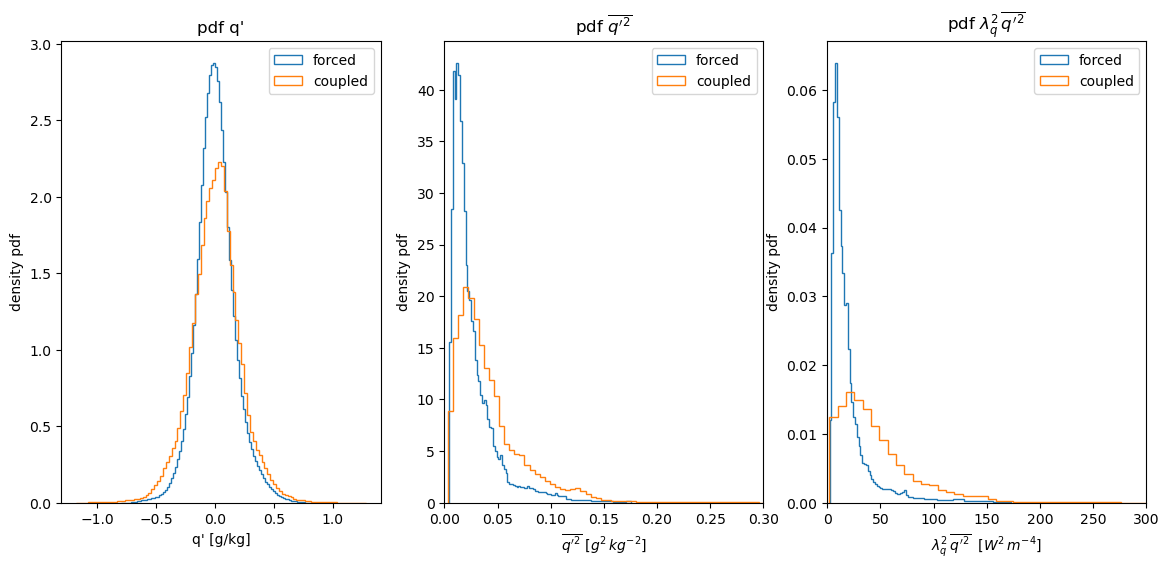

In [103]:
### plots for q

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
# fig.suptitle()

ax[0].hist((ds_hp_primes_for['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_title("pdf q'")
ax[0].set_xlabel("q' [g/kg]"); ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_for['var_qa'].values*1000**2).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['var_qa'].values*1000**2).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(0,0.3)
ax[1].set_title(r"pdf $\overline{q'^2}$")
ax[1].set_xlabel(r"$\overline{q'^2}$ [$g^{2}\,kg^{-2}$]"); ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_for['lambda_q']**2*ds_hp_vars_for['var_qa']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((ds_hp_vars_cou['lambda_q']**2*ds_hp_vars_cou['var_qa']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
ax[2].set_xlim(0,300)
ax[2].set_title(r"pdf $\lambda_q^2\,\overline{q'^2}$")
ax[2].set_xlabel(r"$\lambda_q^2\,\overline{q'^2}$  $[W^2\,m^{-4}]$"); ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/absVal_q_prime.png')



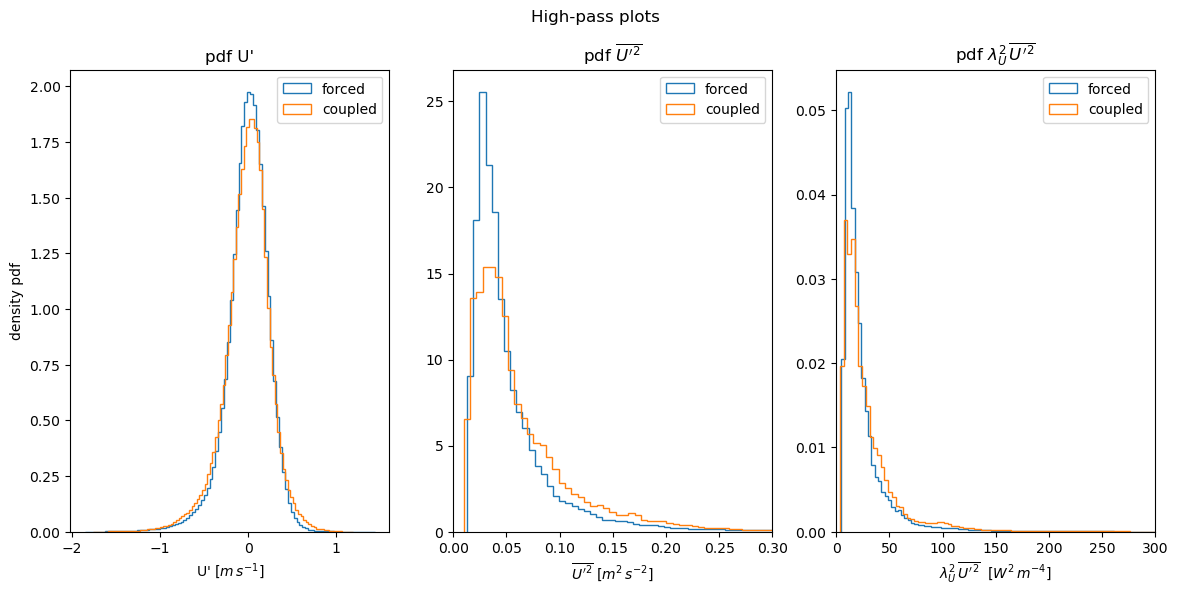

In [104]:
### plots for U

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('High-pass plots')

ax[0].hist((ds_hp_primes_for['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_primes_cou['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_title("pdf U'")
ax[0].set_xlabel(r"U' [$m\,s^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_hp_vars_for['var_U'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['var_U'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(0,0.3)
ax[1].set_title(r"pdf $\overline{U'^2}$")
ax[1].set_xlabel(r"$\overline{U'^2}$ [$m^{2}\,s^{-2}$]"); #ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_for['lambda_U']**2*ds_hp_vars_for['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((ds_hp_vars_cou['lambda_U']**2*ds_hp_vars_cou['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
ax[2].set_xlim(0,300)
ax[2].set_title(r"pdf $\lambda_U^2\,\overline{U'^2}$")
ax[2].set_xlabel(r"$\lambda_U^2\,\overline{U'^2}$  $[W^2\,m^{-4}]$");# ax[2].set_ylabel('density pdf')


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/absVal_U_prime.png')



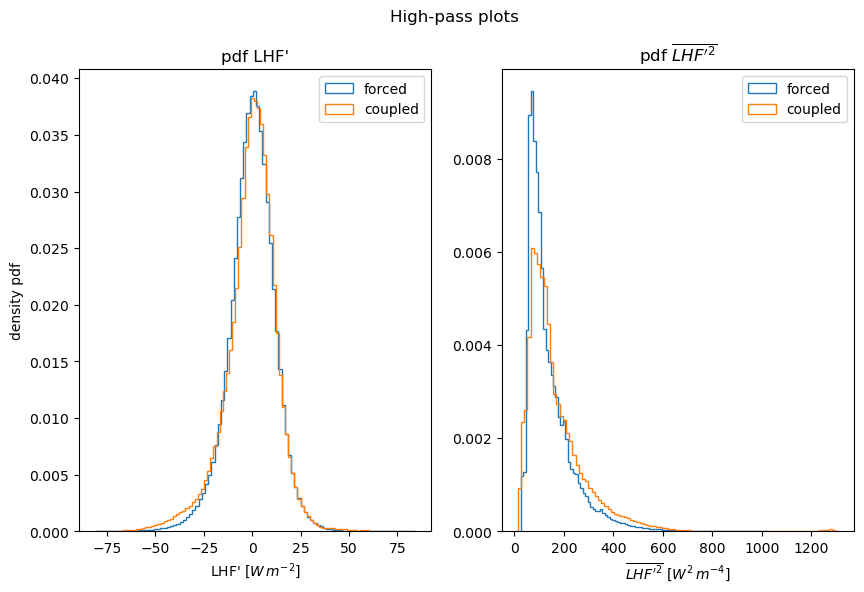

In [105]:
### plots for LHF

fig, ax =  plt.subplots(1,2, figsize=(10,6))
bins = 100
fig.suptitle('High-pass plots')

ax[0].hist((ds_hp_primes_for['lhf_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_primes_cou['lhf_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_title("pdf LHF'")
ax[0].set_xlabel(r"LHF' [$W\,m^{-2}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_hp_vars_for['var_lhf'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['var_lhf'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
# ax[1].set_xlim(1000,1400);   ax[1].set_ylim(0,0.001)
ax[1].set_title(r"pdf $\overline{LHF'^2}$")
ax[1].set_xlabel(r"$\overline{LHF'^2}$ [$W^{2}\,m^{-4}$]"); #ax[1].set_ylabel('density pdf')


# ax[2].hist((ds_hp_vars_for['lambda_U']**2*ds_hp_vars_for['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
# ax[2].hist((ds_hp_vars_cou['lambda_U']**2*ds_hp_vars_cou['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
# ax[2].legend()
# ax[2].set_xlim(0,300)
# ax[2].set_title(r"pdf $\lambda_U^2\,\overline{U'^2}$")
# ax[2].set_xlabel(r"$\lambda_U^2\,\overline{U'^2}$  $[W^2\,m^{-4}]$"); ax[2].set_ylabel('density pdf')


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/absVal_lhf_prime.png')




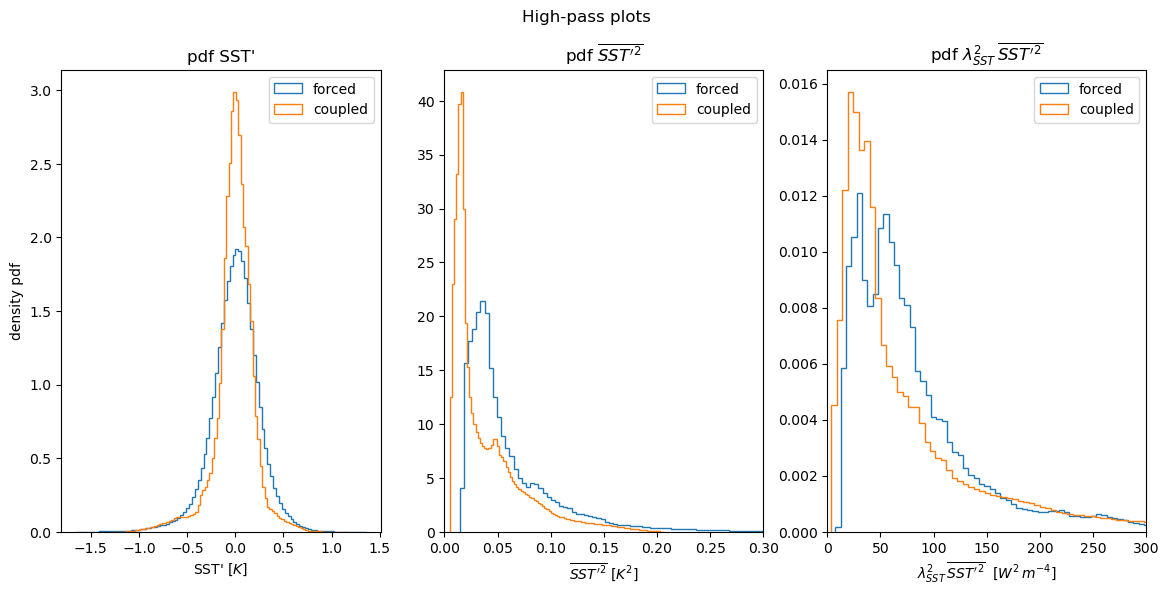

In [106]:
### plots for SST

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('High-pass plots')

ax[0].hist((ds_hp_primes_for['sst_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_primes_cou['sst_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
# ax[0].set_xlim(-1.5,-0.75)
ax[0].set_title("pdf SST'")
ax[0].set_xlabel(r"SST' [$K$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_hp_vars_for['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(0,0.3)
ax[1].set_title(r"pdf $\overline{SST'^2}$")
ax[1].set_xlabel(r"$\overline{SST'^2}$ [$K^{2}$]"); #ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_for['lambda_sst']**2*ds_hp_vars_for['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((ds_hp_vars_cou['lambda_sst']**2*ds_hp_vars_cou['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
ax[2].set_xlim(0,300)
ax[2].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[2].set_xlabel(r"$\lambda_{SST}^2\,\overline{SST'^2}$  $[W^2\,m^{-4}]$");# ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/absVal_sst_prime.png')



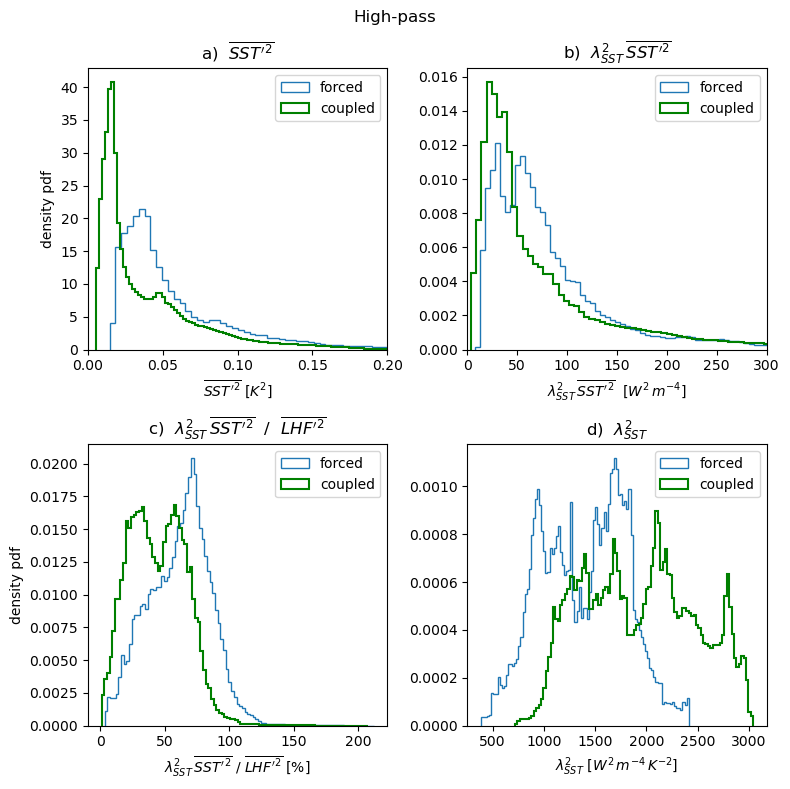

In [62]:

fig, ax =  plt.subplots(2,2, figsize=(8,8))
bins = 100
fig.suptitle('High-pass')

ax = ax.flatten()

ax[0].hist((ds_hp_vars_for['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_vars_cou['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled', color='green', linewidth=1.5)
ax[0].legend()
ax[0].set_xlim(0,0.2)
ax[0].set_title(r"a)  $\overline{SST'^2}$")
ax[0].set_xlabel(r"$\overline{SST'^2}$ [$K^{2}$]"); 
ax[0].set_ylabel('density pdf')


ax[1].hist((ds_hp_vars_for['lambda_sst']**2*ds_hp_vars_for['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['lambda_sst']**2*ds_hp_vars_cou['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', color='green', linewidth=1.5 )
ax[1].legend()
ax[1].set_xlim(0,300)
ax[1].set_title(r"b)  $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[1].set_xlabel(r"$\lambda_{SST}^2\,\overline{SST'^2}$  $[W^2\,m^{-4}]$");




axis = ax[2]
axis.hist((100*ds_hp_vars_for['lambda_sst']**2*ds_hp_vars_for['var_sst']/ds_hp_vars_for['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
axis.hist((100*ds_hp_vars_cou['lambda_sst']**2*ds_hp_vars_cou['var_sst']/ds_hp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', color='green', linewidth=1.5 )
axis.legend()
# ax[1].set_xlim(0,300)
axis.set_title(r"c)  $\lambda_{SST}^2\,\overline{SST'^2}$  /  $\overline{LHF'^2}$")
axis.set_xlabel(r"$\lambda_{SST}^2\,\overline{SST'^2}$ / $\overline{LHF'^2}$ [%]");
axis.set_ylabel('density pdf')





ax[3].hist((ds_hp_vars_for['lambda_sst']**2).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[3].hist((ds_hp_vars_cou['lambda_sst']**2).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', color='green', linewidth=1.5 )
ax[3].legend(loc='upper right')
# ax[3].set_xlim(0,300)
ax[3].set_title(r"d)  $\lambda_{SST}^2$")
ax[3].set_xlabel(r"$\lambda_{SST}^2$ $[W^2\,m^{-4}\,K^{-2}]$")


# ax[0].hist((ds_hp_vars_for['lambda_sst']**2).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
# ax[0].hist((ds_hp_vars_cou['lambda_sst']**2).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
# ax[0].legend()
# # ax[0].set_xlim(0,300)
# ax[0].set_title(r"pdf $\lambda_{SST}^2$  ")
# ax[0].set_xlabel(r"$\lambda_{SST}^2$  $[W^2\,m^{-4}\,K^{-2}]$");




plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/absVal_sst_prime_var.png')


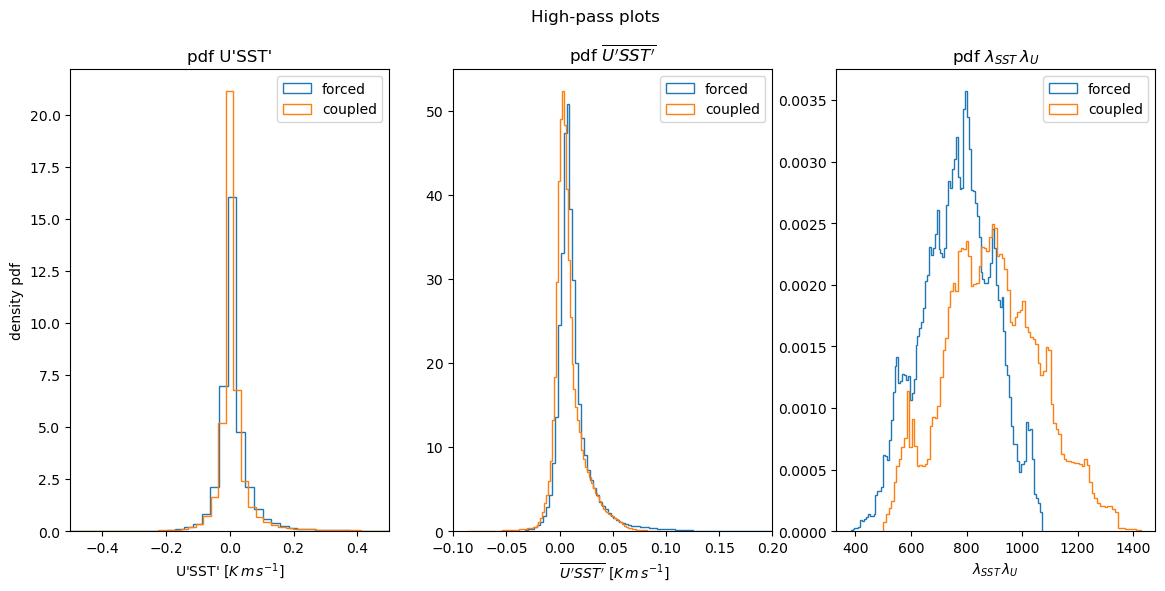

In [108]:
# plots for covar U sst

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('High-pass plots')

ax[0].hist((ds_hp_primes_for['sst_prime']*ds_hp_primes_for['U_prime']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_primes_cou['sst_prime']*ds_hp_primes_cou['U_prime']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_xlim(-0.5,0.5)
ax[0].set_title("pdf U'SST'")
ax[0].set_xlabel(r"U'SST' [$K\,m\,s^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_hp_vars_for['covar_U_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['covar_U_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(-0.1,0.2)
ax[1].set_title(r"pdf $\overline{U'SST'}$")
ax[1].set_xlabel(r" $\overline{U'SST'}$ [$K\,m\,s^{-1}$]"); #ax[1].set_ylabel('density pdf')



to_plot_for = ds_hp_vars_for['lambda_sst']*ds_hp_vars_for['lambda_U']  #*ds_hp_vars_for['covar_U_sst']
to_plot_cou = ds_hp_vars_cou['lambda_sst']*ds_hp_vars_cou['lambda_U']  #*ds_hp_vars_cou['covar_U_sst']

ax[2].hist((to_plot_for).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((to_plot_cou).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
# ax[2].set_xlim(-50,100)
ax[2].set_title(r"pdf $\lambda_{SST}\,\lambda_{U}$")
ax[2].set_xlabel(r"$\lambda_{SST}\,\lambda_{U}$ ");# ax[2].set_ylabel('density pdf')


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/covar_u_sst.png')



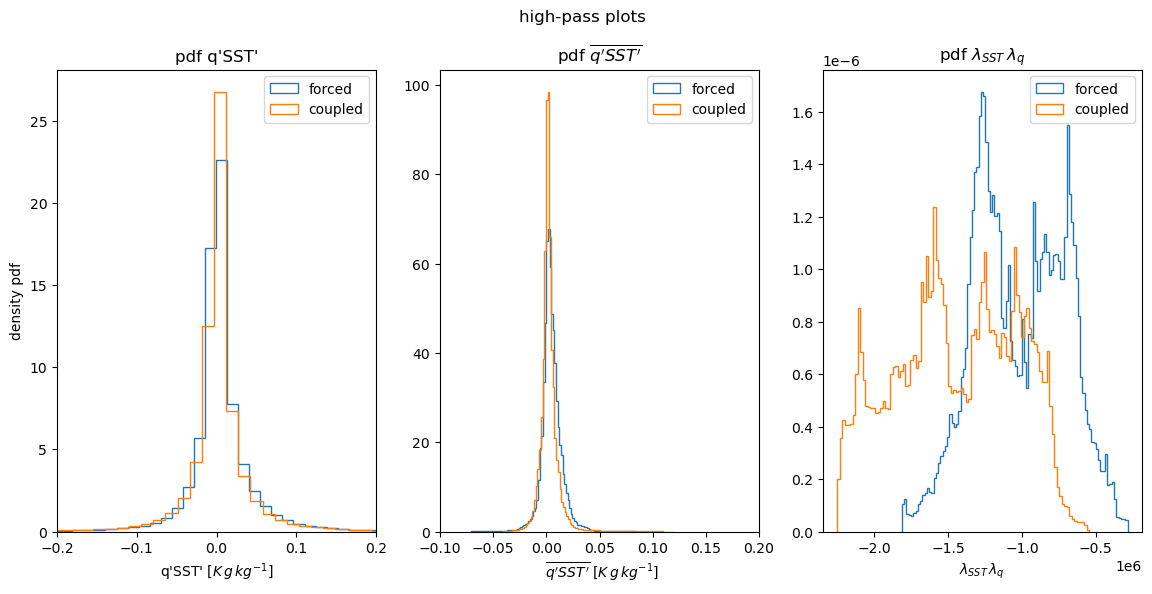

In [109]:
 # plots for covar q sst

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('high-pass plots')

ax[0].hist((ds_hp_primes_for['sst_prime']*ds_hp_primes_for['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_primes_cou['sst_prime']*ds_hp_primes_cou['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_xlim(-0.2,0.2)
ax[0].set_title("pdf q'SST'")
ax[0].set_xlabel(r"q'SST' [$K\,g\,kg^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_hp_vars_for['covar_q_sst']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['covar_q_sst']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(-0.1,0.2)
ax[1].set_title(r"pdf $\overline{q'SST'}$")
ax[1].set_xlabel(r" $\overline{q'SST'}$ [$K\,g\,kg^{-1}$]"); 



to_plot_for = ds_hp_vars_for['lambda_sst']*ds_hp_vars_for['lambda_q']  #*ds_hp_vars_for['covar_U_sst']
to_plot_cou = ds_hp_vars_cou['lambda_sst']*ds_hp_vars_cou['lambda_q']  #*ds_hp_vars_cou['covar_U_sst']

ax[2].hist((to_plot_for).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((to_plot_cou).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
# ax[2].set_xlim(-50,100)
ax[2].set_title(r"pdf $\lambda_{SST}\,\lambda_{q}$")
ax[2].set_xlabel(r"$\lambda_{SST}\,\lambda_{q}$ ");# ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/covar_q_sst.png')



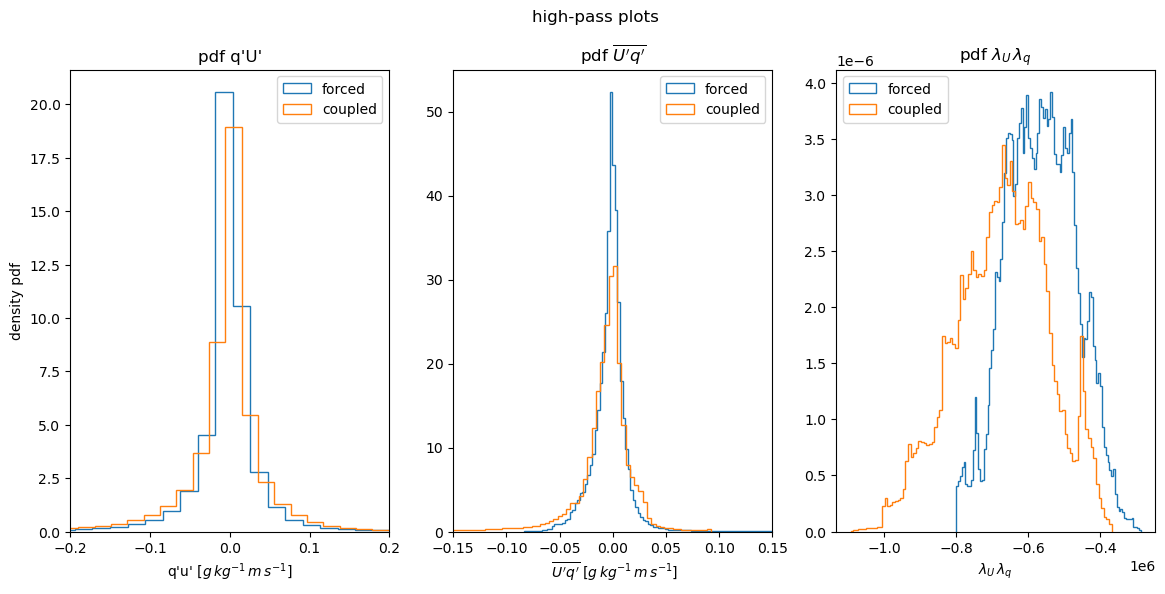

In [111]:
 # plots for covar U q

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('high-pass plots')

ax[0].hist((ds_hp_primes_for['U_prime']*ds_hp_primes_for['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_hp_primes_cou['U_prime']*ds_hp_primes_cou['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_xlim(-0.2,0.2)
ax[0].set_title("pdf q'U'")
ax[0].set_xlabel(r"q'u' [$g\,kg^{-1} \, m\,s^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_hp_vars_for['covar_U_q']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_hp_vars_cou['covar_U_q']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(-0.15,0.15)
ax[1].set_title(r"pdf $\overline{U'q'}$")
ax[1].set_xlabel(r" $\overline{U'q'}$ [$g\,kg^{-1}\,m\,s^{-1}$]"); 



to_plot_for = ds_hp_vars_for['lambda_U']*ds_hp_vars_for['lambda_q']  #*ds_hp_vars_for['covar_U_sst']
to_plot_cou = ds_hp_vars_cou['lambda_U']*ds_hp_vars_cou['lambda_q']  #*ds_hp_vars_cou['covar_U_sst']

ax[2].hist((to_plot_for).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((to_plot_cou).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
# ax[2].set_xlim(-50,100)
ax[2].set_title(r"pdf $\lambda_{U}\,\lambda_{q}$")
ax[2].set_xlabel(r"$\lambda_{U}\,\lambda_{q}$ ");# ax[2].set_ylabel('density pdf')


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/passalto/covar_q_u.png')


# BAND PASS

In [10]:
primes_bandpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_band-pass_lhfDIR_dailyMeans_all.nc',\
                  '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_band-pass_lhfDIR_dailyMeans_all.nc']

In [11]:
ds_bp_primes_cou, ds_bp_primes_for = xr.open_dataset(primes_bandpas[0]), xr.open_dataset(primes_bandpas[1])   
ds_bp_vars_cou, ds_bp_vars_for = xr.open_dataset(primes_bandpas[0]), xr.open_dataset(primes_bandpas[1])

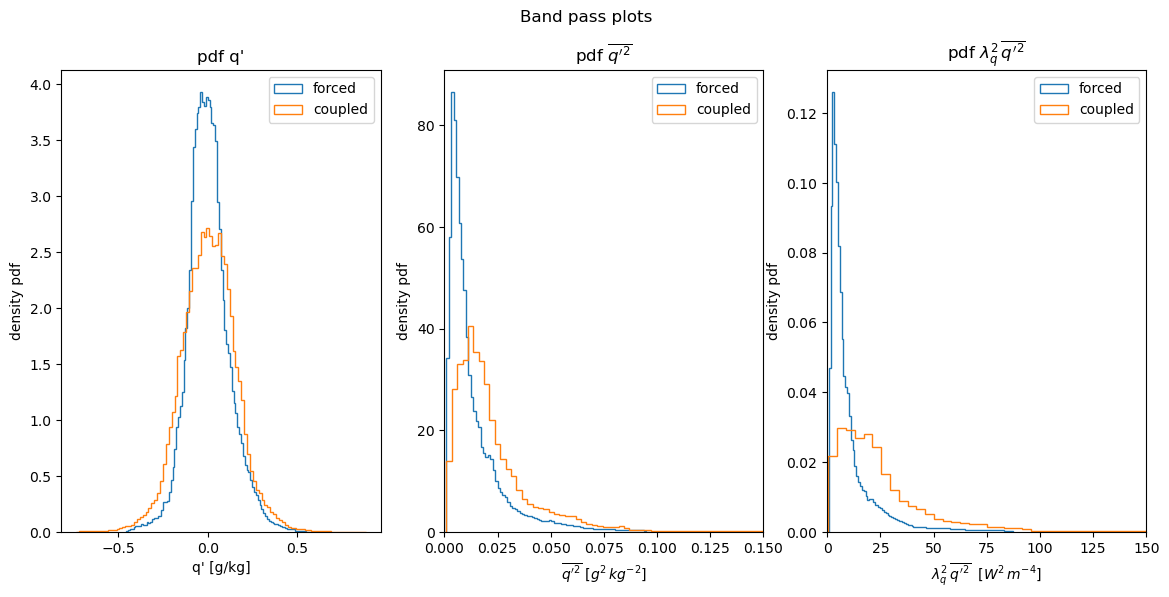

In [112]:
### plots for q

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('Band pass plots')

ax[0].hist((ds_bp_primes_for['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_title("pdf q'")
ax[0].set_xlabel("q' [g/kg]"); ax[0].set_ylabel('density pdf')

ax[1].hist((ds_bp_vars_for['var_qa'].values*1000**2).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_bp_vars_cou['var_qa'].values*1000**2).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(0,0.15)
ax[1].set_title(r"pdf $\overline{q'^2}$")
ax[1].set_xlabel(r"$\overline{q'^2}$ [$g^{2}\,kg^{-2}$]"); ax[1].set_ylabel('density pdf')


ax[2].hist((ds_bp_vars_for['lambda_q']**2*ds_bp_vars_for['var_qa']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((ds_bp_vars_cou['lambda_q']**2*ds_bp_vars_cou['var_qa']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
ax[2].set_xlim(0,150)
ax[2].set_title(r"pdf $\lambda_q^2\,\overline{q'^2}$")
ax[2].set_xlabel(r"$\lambda_q^2\,\overline{q'^2}$  $[W^2\,m^{-4}]$"); ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/absVal_q_prime.png')


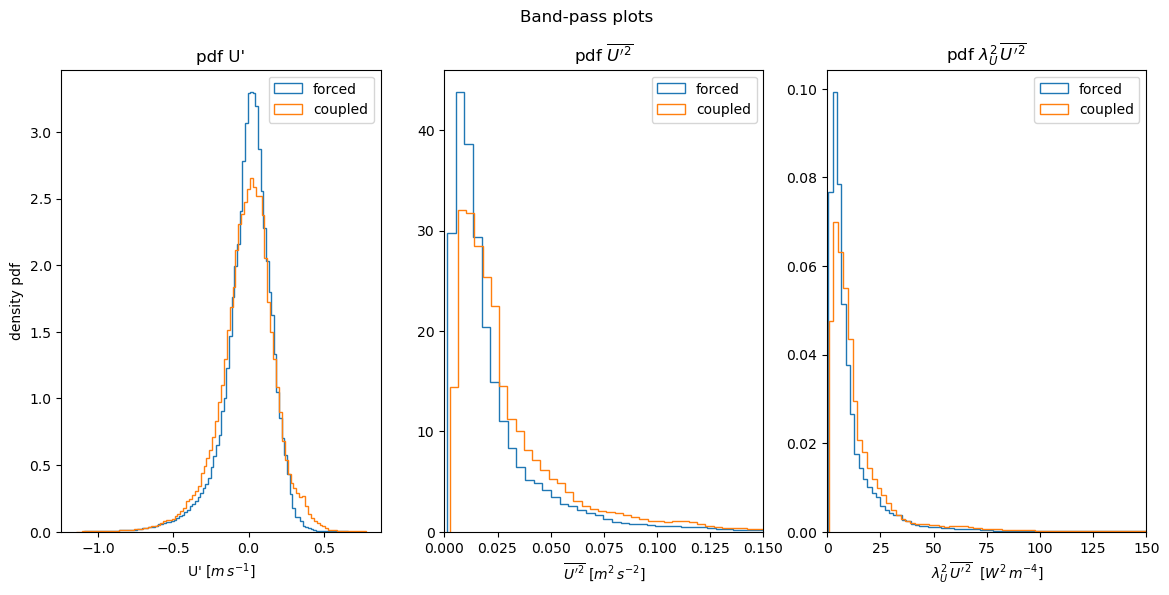

In [113]:
### plots for U

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('Band-pass plots')

ax[0].hist((ds_bp_primes_for['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_primes_cou['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_title("pdf U'")
ax[0].set_xlabel(r"U' [$m\,s^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_bp_vars_for['var_U'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_bp_vars_cou['var_U'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(0,0.15)
ax[1].set_title(r"pdf $\overline{U'^2}$")
ax[1].set_xlabel(r"$\overline{U'^2}$ [$m^{2}\,s^{-2}$]"); #ax[1].set_ylabel('density pdf')


ax[2].hist((ds_bp_vars_for['lambda_U']**2*ds_bp_vars_for['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((ds_bp_vars_cou['lambda_U']**2*ds_bp_vars_cou['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
ax[2].set_xlim(0,150)
ax[2].set_title(r"pdf $\lambda_U^2\,\overline{U'^2}$")
ax[2].set_xlabel(r"$\lambda_U^2\,\overline{U'^2}$  $[W^2\,m^{-4}]$");# ax[2].set_ylabel('density pdf')


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/absVal_U_prime.png')


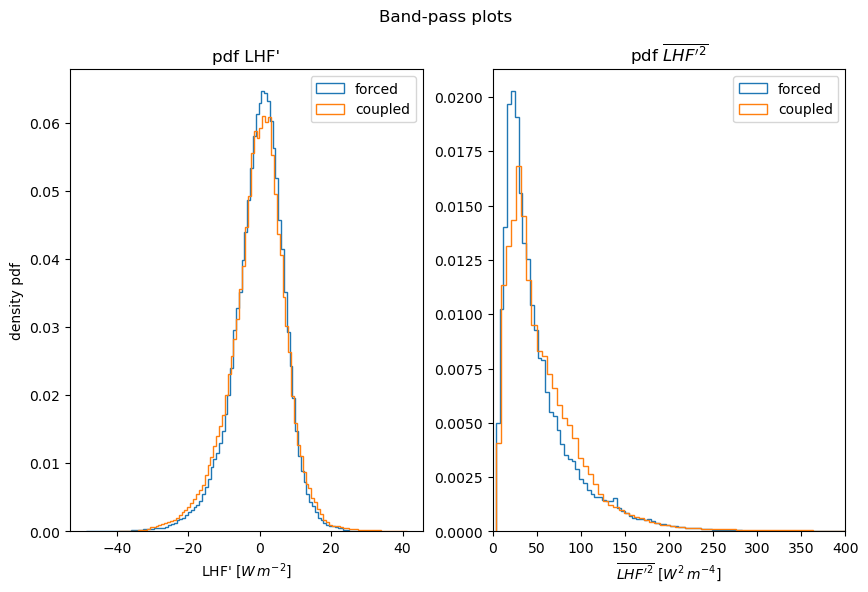

In [114]:
### plots for LHF

fig, ax =  plt.subplots(1,2, figsize=(10,6))
bins = 100
fig.suptitle('Band-pass plots')

ax[0].hist((ds_bp_primes_for['lhf_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_primes_cou['lhf_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_title("pdf LHF'")
ax[0].set_xlabel(r"LHF' [$W\,m^{-2}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_bp_vars_for['var_lhf'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_bp_vars_cou['var_lhf'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(0,400);
ax[1].set_title(r"pdf $\overline{LHF'^2}$")
ax[1].set_xlabel(r"$\overline{LHF'^2}$ [$W^{2}\,m^{-4}$]"); #ax[1].set_ylabel('density pdf')


# ax[2].hist((ds_bp_vars_for['lambda_U']**2*ds_bp_vars_for['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
# ax[2].hist((ds_bp_vars_cou['lambda_U']**2*ds_bp_vars_cou['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
# ax[2].legend()
# ax[2].set_xlim(0,300)
# ax[2].set_title(r"pdf $\lambda_U^2\,\overline{U'^2}$")
# ax[2].set_xlabel(r"$\lambda_U^2\,\overline{U'^2}$  $[W^2\,m^{-4}]$"); ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/absVal_lhf_prime.png')



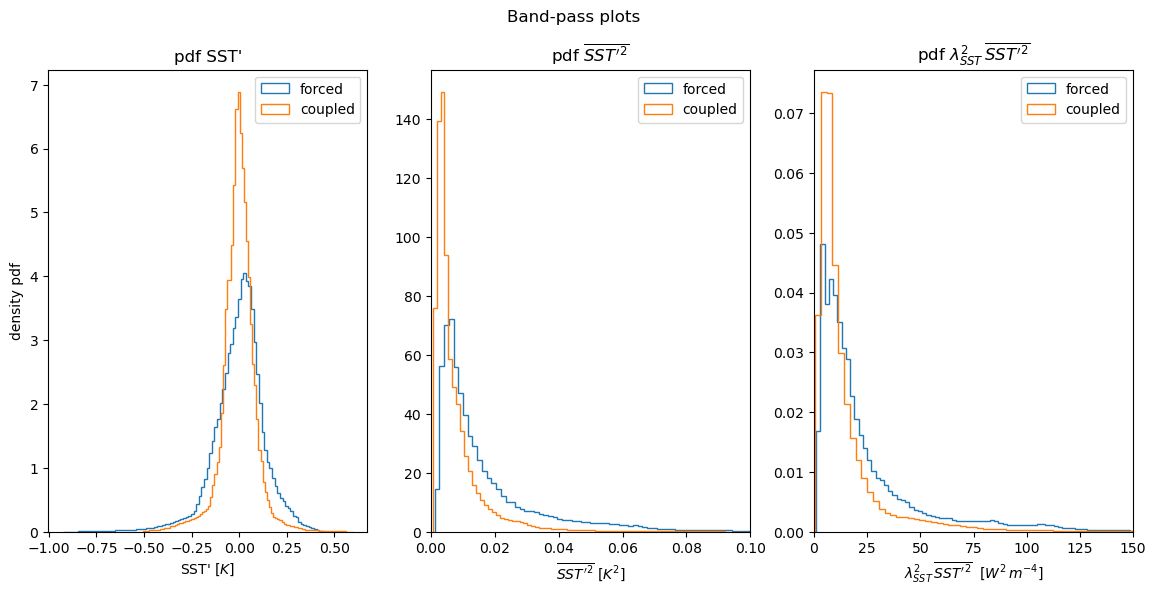

In [115]:
### plots for SST

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('Band-pass plots')

ax[0].hist((ds_bp_primes_for['sst_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_primes_cou['sst_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
# ax[0].set_xlim(-1.5,-0.75)
ax[0].set_title("pdf SST'")
ax[0].set_xlabel(r"SST' [$K$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_bp_vars_for['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_bp_vars_cou['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(0,0.1)
ax[1].set_title(r"pdf $\overline{SST'^2}$")
ax[1].set_xlabel(r"$\overline{SST'^2}$ [$K^{2}$]"); #ax[1].set_ylabel('density pdf')


ax[2].hist((ds_bp_vars_for['lambda_sst']**2*ds_bp_vars_for['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((ds_bp_vars_cou['lambda_sst']**2*ds_bp_vars_cou['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
ax[2].set_xlim(0,150)
ax[2].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[2].set_xlabel(r"$\lambda_{SST}^2\,\overline{SST'^2}$  $[W^2\,m^{-4}]$");# ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/absVal_sst_prime.png')


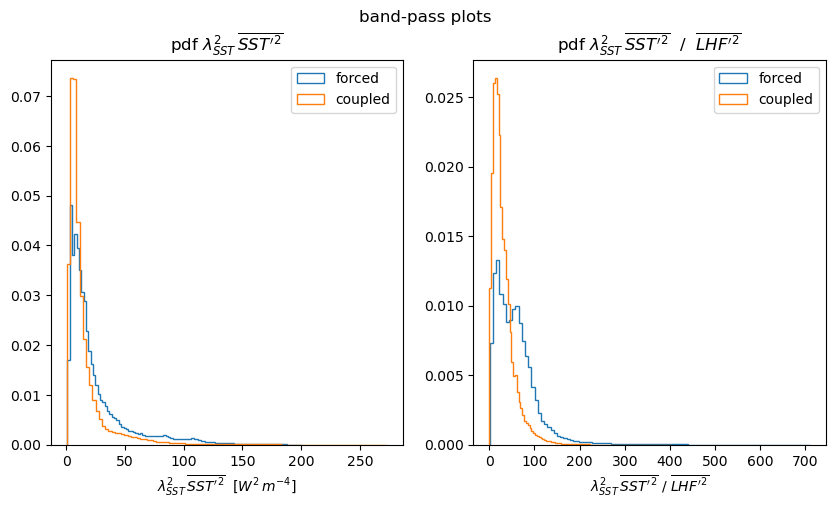

In [116]:
fig, ax =  plt.subplots(1,2, figsize=(10,5))
bins = 100
fig.suptitle('band-pass plots')

ax[0].hist((ds_bp_vars_for['lambda_sst']**2*ds_bp_vars_for['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_vars_cou['lambda_sst']**2*ds_bp_vars_cou['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
# ax[0].set_xlim(0,300)
ax[0].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[0].set_xlabel(r"$\lambda_{SST}^2\,\overline{SST'^2}$  $[W^2\,m^{-4}]$");


# ax[1].hist((ds_bp_vars_for['lambda_sst']**2).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
# ax[1].hist((ds_bp_vars_cou['lambda_sst']**2).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
# ax[1].legend()
# # ax[1].set_xlim(0,300)
# ax[1].set_title(r"pdf $\lambda_{SST}^2$  ")
# ax[1].set_xlabel(r"$\lambda_{SST}^2$  $[W^2\,m^{-4}\,K^{-2}]$");

axis = ax[1]
axis.hist((100*ds_bp_vars_for['lambda_sst']**2*ds_bp_vars_for['var_sst']/ds_bp_vars_for['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
axis.hist((100*ds_bp_vars_cou['lambda_sst']**2*ds_bp_vars_cou['var_sst']/ds_bp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
axis.legend()
# ax[2].set_xlim(0,300)
axis.set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$  /  $\overline{LHF'^2}$")
axis.set_xlabel(r"$\lambda_{SST}^2\,\overline{SST'^2}$ / $\overline{LHF'^2}$ ");# ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/absVal_sst_prime_var.png')


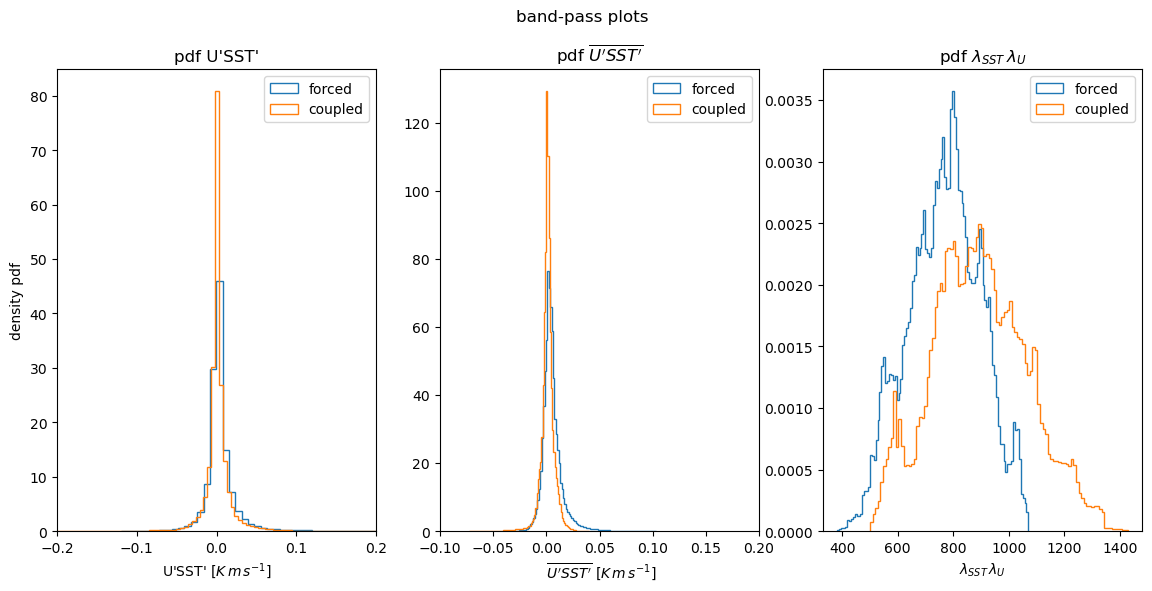

In [117]:
 # plots for covar U sst

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('band-pass plots')

ax[0].hist((ds_bp_primes_for['sst_prime']*ds_bp_primes_for['U_prime']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_primes_cou['sst_prime']*ds_bp_primes_cou['U_prime']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_xlim(-0.2,0.2)
ax[0].set_title("pdf U'SST'")
ax[0].set_xlabel(r"U'SST' [$K\,m\,s^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_bp_vars_for['covar_U_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_bp_vars_cou['covar_U_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(-0.1,0.2)
ax[1].set_title(r"pdf $\overline{U'SST'}$")
ax[1].set_xlabel(r" $\overline{U'SST'}$ [$K\,m\,s^{-1}$]"); #ax[1].set_ylabel('density pdf')



to_plot_for = ds_bp_vars_for['lambda_sst']*ds_bp_vars_for['lambda_U']  #*ds_bp_vars_for['covar_U_sst']
to_plot_cou = ds_bp_vars_cou['lambda_sst']*ds_bp_vars_cou['lambda_U']  #*ds_bp_vars_cou['covar_U_sst']

ax[2].hist((to_plot_for).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((to_plot_cou).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
# ax[2].set_xlim(-50,100)
ax[2].set_title(r"pdf $\lambda_{SST}\,\lambda_{U}$")
ax[2].set_xlabel(r"$\lambda_{SST}\,\lambda_{U}$ ");# ax[2].set_ylabel('density pdf')


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/covar_u_sst.png')



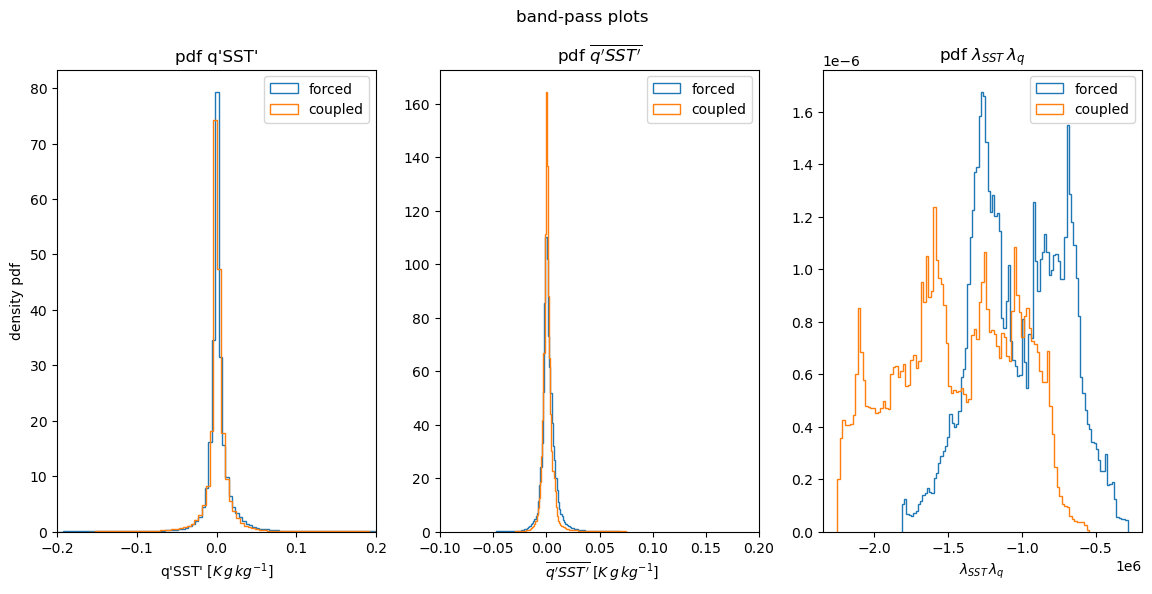

In [118]:
 # plots for covar q sst

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('band-pass plots')

ax[0].hist((ds_bp_primes_for['sst_prime']*ds_bp_primes_for['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_primes_cou['sst_prime']*ds_bp_primes_cou['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_xlim(-0.2,0.2)
ax[0].set_title("pdf q'SST'")
ax[0].set_xlabel(r"q'SST' [$K\,g\,kg^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_bp_vars_for['covar_q_sst']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_bp_vars_cou['covar_q_sst']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(-0.1,0.2)
ax[1].set_title(r"pdf $\overline{q'SST'}$")
ax[1].set_xlabel(r" $\overline{q'SST'}$ [$K\,g\,kg^{-1}$]"); 



to_plot_for = ds_bp_vars_for['lambda_sst']*ds_bp_vars_for['lambda_q']  #*ds_bp_vars_for['covar_U_sst']
to_plot_cou = ds_bp_vars_cou['lambda_sst']*ds_bp_vars_cou['lambda_q']  #*ds_bp_vars_cou['covar_U_sst']

ax[2].hist((to_plot_for).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((to_plot_cou).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
# ax[2].set_xlim(-50,100)
ax[2].set_title(r"pdf $\lambda_{SST}\,\lambda_{q}$")
ax[2].set_xlabel(r"$\lambda_{SST}\,\lambda_{q}$ ");# ax[2].set_ylabel('density pdf')


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/covar_q_sst.png')




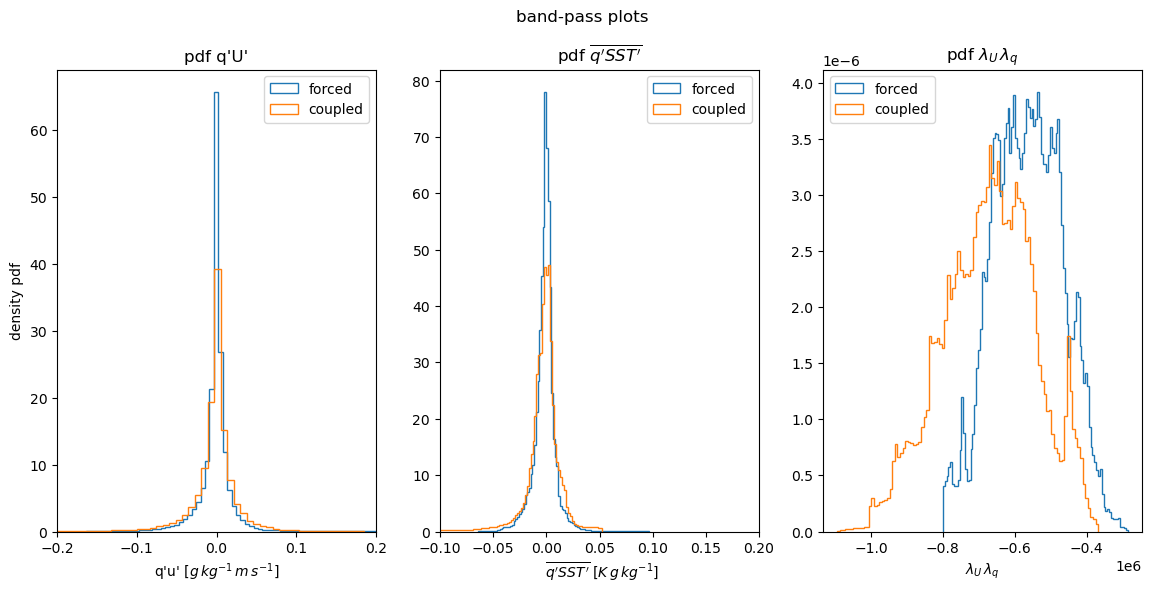

In [119]:
 # plots for covar U q

fig, ax =  plt.subplots(1,3, figsize=(14,6))
bins = 100
fig.suptitle('band-pass plots')

ax[0].hist((ds_bp_primes_for['U_prime']*ds_bp_primes_for['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[0].hist((ds_bp_primes_cou['U_prime']*ds_bp_primes_cou['qa_prime']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[0].legend()
ax[0].set_xlim(-0.2,0.2)
ax[0].set_title("pdf q'U'")
ax[0].set_xlabel(r"q'u' [$g\,kg^{-1} \, m\,s^{-1}$]"); ax[0].set_ylabel('density pdf')


ax[1].hist((ds_bp_vars_for['covar_U_q']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[1].hist((ds_bp_vars_cou['covar_U_q']*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[1].legend()
ax[1].set_xlim(-0.1,0.2)
ax[1].set_title(r"pdf $\overline{q'SST'}$")
ax[1].set_xlabel(r" $\overline{q'SST'}$ [$K\,g\,kg^{-1}$]"); 



to_plot_for = ds_bp_vars_for['lambda_U']*ds_bp_vars_for['lambda_q']  #*ds_bp_vars_for['covar_U_sst']
to_plot_cou = ds_bp_vars_cou['lambda_U']*ds_bp_vars_cou['lambda_q']  #*ds_bp_vars_cou['covar_U_sst']

ax[2].hist((to_plot_for).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced')
ax[2].hist((to_plot_cou).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled')
ax[2].legend()
# ax[2].set_xlim(-50,100)
ax[2].set_title(r"pdf $\lambda_{U}\,\lambda_{q}$")
ax[2].set_xlabel(r"$\lambda_{U}\,\lambda_{q}$ ");# ax[2].set_ylabel('density pdf')



# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/ForCou_img/band-pass/covar_q_sst.png')



## COMPARING HP AND BP in the coupled only

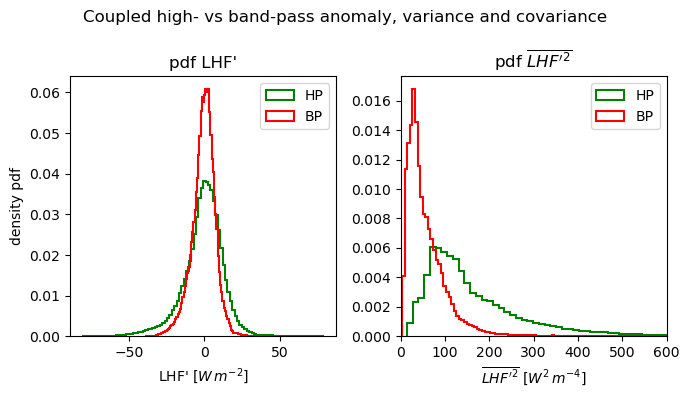

In [17]:
fig, ax =  plt.subplots(1,2, figsize=(7,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')

ax[0].hist((ds_hp_primes_cou['lhf_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5 )
ax[0].hist((ds_bp_primes_cou['lhf_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[0].legend()
ax[0].set_title("pdf LHF'")
ax[0].set_xlabel(r"LHF' [$W\,m^{-2}$]"); 
ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_cou['var_lhf'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[1].hist((ds_bp_vars_cou['var_lhf'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[1].legend()
ax[1].set_xlim(0,600)
ax[1].set_title(r"pdf $\overline{LHF'^2}$")
ax[1].set_xlabel(r"$\overline{LHF'^2}$ [$W^{2}\,m^{-4}$]"); 
# ax[1].set_ylabel('density pdf')

plt.tight_layout()

# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/absoluteValues_anoms-vars-covars_coupled/absVal_LHFPrime_HpBp.png')


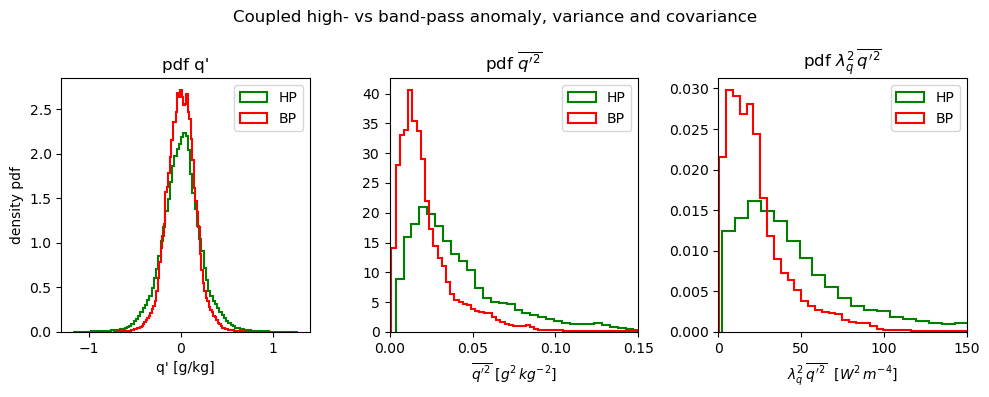

In [41]:
fig, ax =  plt.subplots(1,3, figsize=(10,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')

ax[0].hist((ds_hp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5 )
ax[0].hist((ds_bp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[0].legend()
ax[0].set_title("pdf q'")
ax[0].set_xlabel("q' [g/kg]"); 
ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_cou['var_qa'].values*1000**2).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[1].hist((ds_bp_vars_cou['var_qa'].values*1000**2).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[1].legend()
ax[1].set_xlim(0,0.15)
ax[1].set_title(r"pdf $\overline{q'^2}$")
ax[1].set_xlabel(r"$\overline{q'^2}$ [$g^{2}\,kg^{-2}$]"); 
# ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_cou['lambda_q']**2*ds_hp_vars_cou['var_qa']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[2].hist((ds_bp_vars_cou['lambda_q']**2*ds_bp_vars_cou['var_qa']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[2].legend()
ax[2].set_xlim(0,150)
ax[2].set_title(r"pdf $\lambda_q^2\,\overline{q'^2}$")
ax[2].set_xlabel(r"$\lambda_q^2\,\overline{q'^2}$  $[W^2\,m^{-4}]$");
# ax[2].set_ylabel('density pdf')



# ax[1,1].hist((ds_hp_vars_cou['lambda_q']**2*ds_hp_vars_cou['var_qa']/ds_hp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green')
# ax[1,1].hist((ds_bp_vars_cou['lambda_q']**2*ds_bp_vars_cou['var_qa']/ds_bp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red')
# ax[1,1].legend()
# ax[1,1].set_xlim(0,2)
# ax[1,1].set_title(r"pdf relative contribution [%]")
# ax[1,1].set_xlabel(r"$\lambda_q^2\,\overline{q'^2}$ / $\overline{LHF'^2} $"); ax[1,1].set_ylabel('density pdf')


plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/absoluteValues_anoms-vars-covars_coupled/absVal_qPrime_HpBp.png')

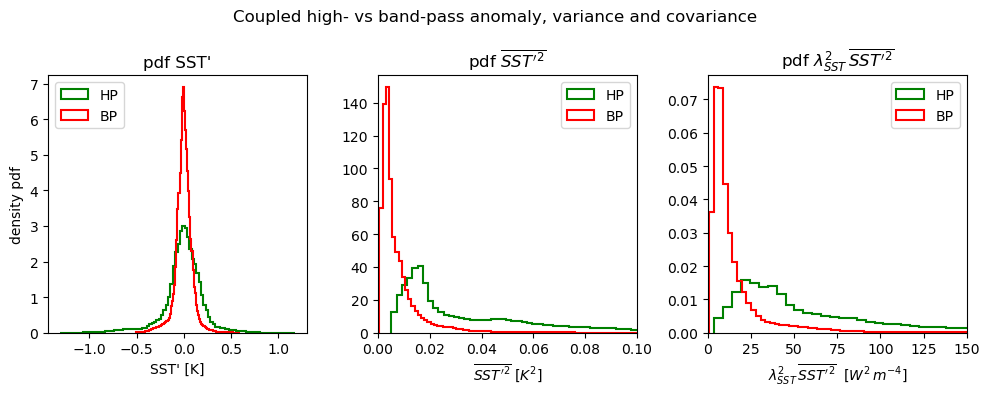

In [40]:
fig, ax =  plt.subplots(1,3, figsize=(10,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')

ax[0].hist((ds_hp_primes_cou['sst_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5 )
ax[0].hist((ds_bp_primes_cou['sst_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[0].legend()
ax[0].set_title("pdf SST'")
ax[0].set_xlabel("SST' [K]"); 
ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_cou['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[1].hist((ds_bp_vars_cou['var_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[1].legend()
ax[1].set_xlim(0,0.1)
ax[1].set_title(r"pdf $\overline{SST'^2}$")
ax[1].set_xlabel(r"$\overline{SST'^2}$ [$K^{2}$]"); 
# ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_cou['lambda_sst']**2*ds_hp_vars_cou['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[2].hist((ds_bp_vars_cou['lambda_sst']**2*ds_bp_vars_cou['var_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[2].legend()
ax[2].set_xlim(0,150)
ax[2].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[2].set_xlabel(r"$\lambda_{SST}^2\,\overline{SST'^2}$  $[W^2\,m^{-4}]$");
# ax[2].set_ylabel('density pdf')



# ax[1,1].hist((ds_hp_vars_cou['lambda_q']**2*ds_hp_vars_cou['var_qa']/ds_hp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green')
# ax[1,1].hist((ds_bp_vars_cou['lambda_q']**2*ds_bp_vars_cou['var_qa']/ds_bp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red')
# ax[1,1].legend()
# ax[1,1].set_xlim(0,2)
# ax[1,1].set_title(r"pdf relative contribution [%]")
# ax[1,1].set_xlabel(r"$\lambda_q^2\,\overline{q'^2}$ / $\overline{LHF'^2} $"); ax[1,1].set_ylabel('density pdf')


plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/absoluteValues_anoms-vars-covars_coupled/absVal_SSTPrime_HpBp.png')

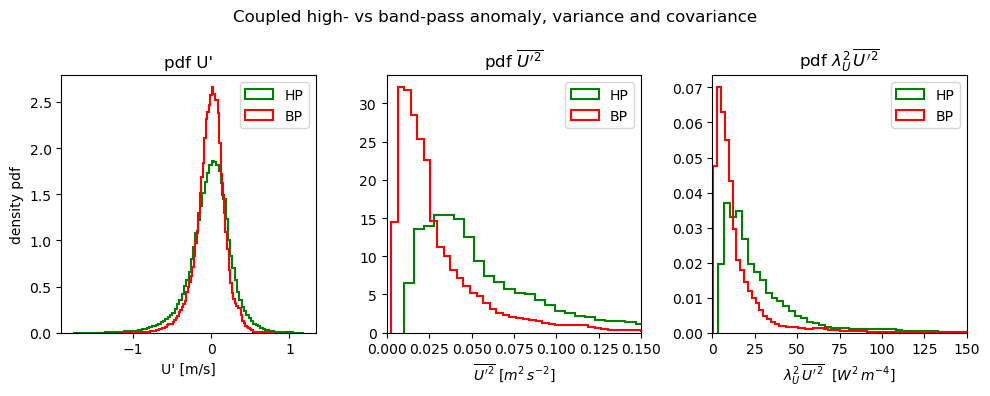

In [42]:
fig, ax =  plt.subplots(1,3, figsize=(10,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')

ax[0].hist((ds_hp_primes_cou['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5 )
ax[0].hist((ds_bp_primes_cou['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[0].legend()
ax[0].set_title("pdf U'")
ax[0].set_xlabel("U' [m/s]"); 
ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_cou['var_U'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[1].hist((ds_bp_vars_cou['var_U'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[1].legend()
ax[1].set_xlim(0,0.15)
ax[1].set_title(r"pdf $\overline{U'^2}$")
ax[1].set_xlabel(r"$\overline{U'^2}$ [$m^{2}\,s^{-2}$]"); 
# ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_cou['lambda_U']**2*ds_hp_vars_cou['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[2].hist((ds_bp_vars_cou['lambda_U']**2*ds_bp_vars_cou['var_U']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[2].legend()
ax[2].set_xlim(0,150)
ax[2].set_title(r"pdf $\lambda_{U}^2\,\overline{U'^2}$")
ax[2].set_xlabel(r"$\lambda_{U}^2\,\overline{U'^2}$  $[W^2\,m^{-4}]$");
# ax[2].set_ylabel('density pdf')



# ax[1,1].hist((ds_hp_vars_cou['lambda_q']**2*ds_hp_vars_cou['var_qa']/ds_hp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green')
# ax[1,1].hist((ds_bp_vars_cou['lambda_q']**2*ds_bp_vars_cou['var_qa']/ds_bp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red')
# ax[1,1].legend()
# ax[1,1].set_xlim(0,2)
# ax[1,1].set_title(r"pdf relative contribution [%]")
# ax[1,1].set_xlabel(r"$\lambda_q^2\,\overline{q'^2}$ / $\overline{LHF'^2} $"); ax[1,1].set_ylabel('density pdf')


plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/absoluteValues_anoms-vars-covars_coupled/absVal_UPrime_HpBp.png')

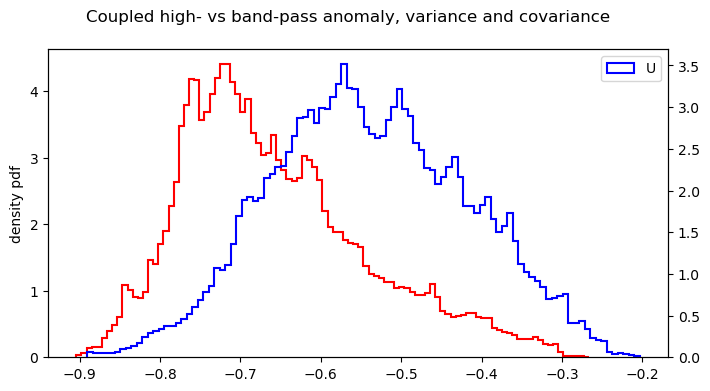

In [35]:

##### WHO IS CHANGING MORE?
####  WIND  VS  LHF


fig, ax =  plt.subplots(1,1, figsize=(8,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')


x_lhf = ((ds_bp_primes_cou['var_lhf'] - ds_hp_primes_cou['var_lhf'])/ds_hp_primes_cou['var_lhf']).values.flatten()
x_lhf = x_lhf[~np.isnan(x_lhf)]
ax.hist(x_lhf,bins=bins,histtype=u'step',density=True, label='LHF', linewidth=1.5, color='red' )
# ax[0].hist((ds_bp_primes_cou['var_lhf'].values*ds_bp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
# ax[0].set_xlim(-0.1,0.1)
# ax.set_title("pdf var LHF ratio")
# ax.set_xlabel("$\overline{LHF'^2}_{BP}$ / $\overline{LHF'^2}_{HP}$"); 
ax.set_ylabel('density pdf')

ax1 = ax.twinx()

x_u = ((ds_bp_vars_cou['var_U'] - ds_hp_vars_cou['var_U'])/ds_hp_vars_cou['var_U']).values.flatten()
x_u = x_u[~np.isnan(x_u)]
ax1.hist(x_u,bins=bins,histtype=u'step',density=True, label='U', linewidth=1.5, color='blue')
# ax1.hist((ds_bp_vars_cou['covar_q_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
# ax1.set_xlim(-0.1,0.1)
# ax1.set_title(r"pdf var U ratio")
# ax1.set_xlabel(r"$\overline{U'^2}_{BP}$ / $\overline{U'^2}_{HP}$ "); 
# ax.set_ylabel('density pdf')

plt.legend()

#### HP v BP covariances

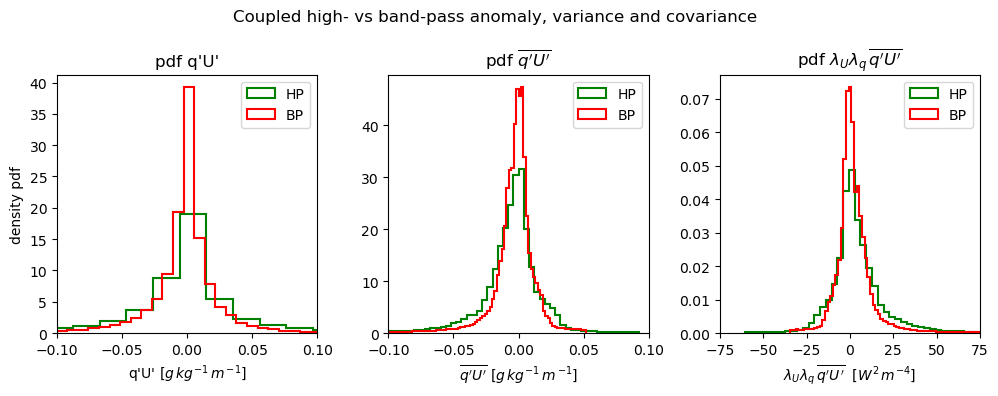

In [49]:
fig, ax =  plt.subplots(1,3, figsize=(10,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')

ax[0].hist((ds_hp_primes_cou['U_prime'].values*ds_hp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5 )
ax[0].hist((ds_bp_primes_cou['U_prime'].values*ds_bp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[0].legend()
ax[0].set_xlim(-0.1,0.1)
ax[0].set_title("pdf q'U'")
ax[0].set_xlabel("q'U' [$g\,kg^{-1} \, m\,^{-1}$]"); 
ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_cou['covar_U_q'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[1].hist((ds_bp_vars_cou['covar_U_q'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[1].legend()
ax[1].set_xlim(-0.1,0.1)
ax[1].set_title(r"pdf $\overline{q'U'}$")
ax[1].set_xlabel(r"$\overline{q'U'}$ [$g\,kg^{-1} \, m\,^{-1}$]"); 
# ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_cou['lambda_U']*ds_hp_vars_cou['lambda_q']*ds_hp_vars_cou['covar_U_q']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[2].hist((ds_bp_vars_cou['lambda_U']*ds_bp_vars_cou['lambda_q']*ds_bp_vars_cou['covar_U_q']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[2].legend()
ax[2].set_xlim(-75,75)
ax[2].set_title(r"pdf $\lambda_{U}\lambda_{q}\,\overline{q'U'}$")
ax[2].set_xlabel(r"$\lambda_{U}\lambda_{q}\,\overline{q'U'}$  $[W^2\,m^{-4}]$");
# ax[2].set_ylabel('density pdf')



# ax[1,1].hist((ds_hp_vars_cou['lambda_q']**2*ds_hp_vars_cou['var_qa']/ds_hp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green')
# ax[1,1].hist((ds_bp_vars_cou['lambda_q']**2*ds_bp_vars_cou['var_qa']/ds_bp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red')
# ax[1,1].legend()
# ax[1,1].set_xlim(0,2)
# ax[1,1].set_title(r"pdf relative contribution [%]")
# ax[1,1].set_xlabel(r"$\lambda_q^2\,\overline{q'^2}$ / $\overline{LHF'^2} $"); ax[1,1].set_ylabel('density pdf')


plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/absoluteValues_anoms-vars-covars_coupled/absVal_qU_HpBp.png')

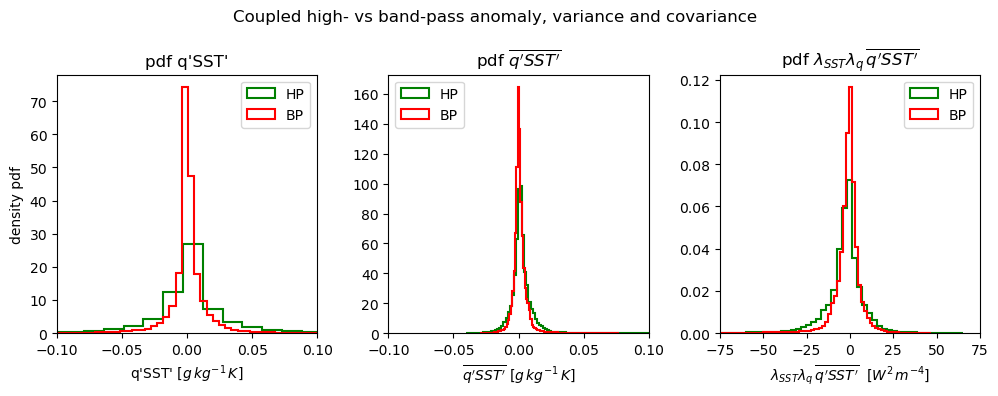

In [43]:
fig, ax =  plt.subplots(1,3, figsize=(10,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')

ax = ax.flatten()

ax[0].hist((ds_hp_primes_cou['sst_prime'].values*ds_hp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5 )
ax[0].hist((ds_bp_primes_cou['sst_prime'].values*ds_bp_primes_cou['qa_prime'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[0].legend()
ax[0].set_xlim(-0.1,0.1)
ax[0].set_title("pdf q'SST'")
ax[0].set_xlabel("q'SST' [$g\,kg^{-1} \, K$]"); 
ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_cou['covar_q_sst'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[1].hist((ds_bp_vars_cou['covar_q_sst'].values*1000).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[1].legend()
ax[1].set_xlim(-0.1,0.1)
ax[1].set_title(r"pdf $\overline{q'SST'}$")
ax[1].set_xlabel(r"$\overline{q'SST'}$ [$g\,kg^{-1} \, K$]"); 
# ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_cou['lambda_sst']*ds_hp_vars_cou['lambda_q']*ds_hp_vars_cou['covar_q_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[2].hist((ds_bp_vars_cou['lambda_sst']*ds_bp_vars_cou['lambda_q']*ds_bp_vars_cou['covar_q_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[2].legend()
ax[2].set_xlim(-75,75)
ax[2].set_title(r"pdf $\lambda_{SST}\lambda_{q}\,\overline{q'SST'}$")
ax[2].set_xlabel(r"$\lambda_{SST}\lambda_{q}\,\overline{q'SST'}$  $[W^2\,m^{-4}]$");
# ax[2].set_ylabel('density pdf')



# ax[3].hist((2*ds_hp_vars_cou['lambda_sst']*ds_hp_vars_cou['lambda_q']*ds_hp_vars_cou['covar_q_sst']*100/ds_hp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green')
# ax[3].hist((2*ds_bp_vars_cou['lambda_sst']*ds_bp_vars_cou['lambda_q']*ds_bp_vars_cou['covar_q_sst']*100/ds_bp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red')
# ax[3].legend()
# ax[3].set_xlim(-100,75)
# ax[3].set_title(r"pdf relative contribution [%]")
# ax[3].set_xlabel(r"$2\lambda_q \lambda_{SST}\,\overline{q'SST'}$ / $\overline{LHF'^2} $"); 
# ax[3].set_ylabel('density pdf')


plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/absoluteValues_anoms-vars-covars_coupled/absVal_qSST_HpBp.png')

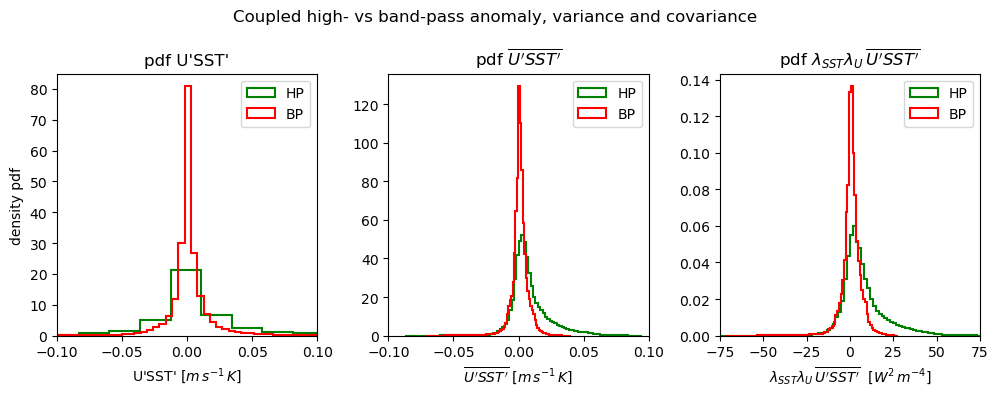

In [45]:
fig, ax =  plt.subplots(1,3, figsize=(10,4))
bins = 100
fig.suptitle('Coupled high- vs band-pass anomaly, variance and covariance')

ax = ax.flatten()

ax[0].hist((ds_hp_primes_cou['sst_prime'].values*ds_hp_primes_cou['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5 )
ax[0].hist((ds_bp_primes_cou['sst_prime'].values*ds_bp_primes_cou['U_prime'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[0].legend()
ax[0].set_xlim(-0.1,0.1)
ax[0].set_title("pdf U'SST'")
ax[0].set_xlabel("U'SST' [$m\,s^{-1} \, K$]"); 
ax[0].set_ylabel('density pdf')

ax[1].hist((ds_hp_vars_cou['covar_U_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[1].hist((ds_bp_vars_cou['covar_U_sst'].values).flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[1].legend()
ax[1].set_xlim(-0.1,0.1)
ax[1].set_title(r"pdf $\overline{U'SST'}$")
ax[1].set_xlabel(r"$\overline{U'SST'}$ [$m\,s^{-1} \, K$]"); 
# ax[1].set_ylabel('density pdf')


ax[2].hist((ds_hp_vars_cou['lambda_sst']*ds_hp_vars_cou['lambda_U']*ds_hp_vars_cou['covar_U_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green', linewidth=1.5)
ax[2].hist((ds_bp_vars_cou['lambda_sst']*ds_bp_vars_cou['lambda_U']*ds_bp_vars_cou['covar_U_sst']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red', linewidth=1.5)
ax[2].legend()
ax[2].set_xlim(-75,75)
ax[2].set_title(r"pdf $\lambda_{SST}\lambda_{U}\,\overline{U'SST'}$")
ax[2].set_xlabel(r"$\lambda_{SST}\lambda_{U}\,\overline{U'SST'}$  $[W^2\,m^{-4}]$");
# ax[2].set_ylabel('density pdf')



# ax[3].hist((2*ds_hp_vars_cou['lambda_sst']*ds_hp_vars_cou['lambda_q']*ds_hp_vars_cou['covar_q_sst']*100/ds_hp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='HP', color='green')
# ax[3].hist((2*ds_bp_vars_cou['lambda_sst']*ds_bp_vars_cou['lambda_q']*ds_bp_vars_cou['covar_q_sst']*100/ds_bp_vars_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='BP', color='red')
# ax[3].legend()
# ax[3].set_xlim(-100,75)
# ax[3].set_title(r"pdf relative contribution [%]")
# ax[3].set_xlabel(r"$2\lambda_q \lambda_{SST}\,\overline{q'SST'}$ / $\overline{LHF'^2} $"); 
# ax[3].set_ylabel('density pdf')


plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/absoluteValues_anoms-vars-covars_coupled/absVal_USST_HpBp.png')

# nuovi plot per Ago: anoms_vars_percent_HPBP_CouFor

In [ ]:
# primes_highpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_passalto_lhfDIR_dailyMeans_all.nc',\
#                   '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_passalto_lhfDIR_dailyMeans_all.nc']

# ds_hp_primes_cou, ds_hp_primes_for = xr.open_dataset(primes_highpas[0]), xr.open_dataset(primes_highpas[1])   
# ds_hp_vars_cou, ds_hp_vars_for = xr.open_dataset(primes_highpas[0]), xr.open_dataset(primes_highpas[1])

# primes_bandpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_band-pass_lhfDIR_dailyMeans_all.nc',\
#                   '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_band-pass_lhfDIR_dailyMeans_all.nc']


# ds_bp_primes_cou, ds_bp_primes_for = xr.open_dataset(primes_bandpas[0]), xr.open_dataset(primes_bandpas[1])   
# ds_bp_vars_cou, ds_bp_vars_for = xr.open_dataset(primes_bandpas[0]), xr.open_dataset(primes_bandpas[1])

In [7]:
primes_highpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_passalto_lhfDIR_dailyMeans_all.nc',\
                  '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_passalto_lhfDIR_dailyMeans_all.nc']

ds_hp_dir_cou, ds_hp_dir_for = xr.open_dataset(primes_highpas[0]), xr.open_dataset(primes_highpas[1])


primes_bandpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_band-pass_lhfDIR_dailyMeans_all.nc',\
                  '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_band-pass_lhfDIR_dailyMeans_all.nc']


ds_bp_dir_cou, ds_bp_dir_for = xr.open_dataset(primes_bandpas[0]), xr.open_dataset(primes_bandpas[1])

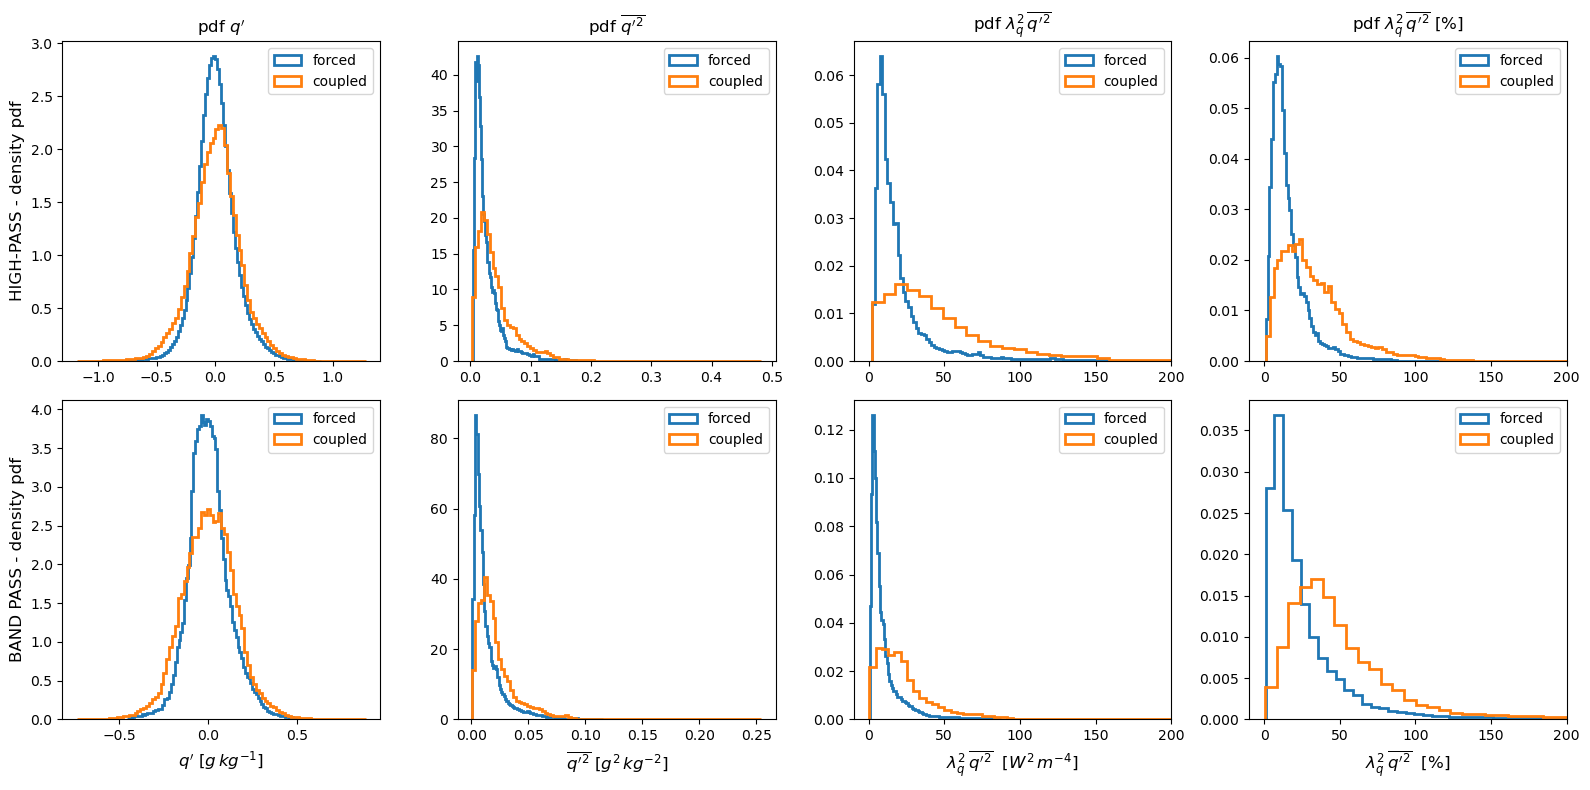

In [65]:

fig, ax =  plt.subplots(2,4, figsize=(16,8))
ax = ax.flatten()
bins = 100
# fig.suptitle('High-pass plots')

prime = 'qa_prime'
# prime_1 = 'qa_prime'
# prime_2 = 'sst_prime'

var_covar = 'var_qa'

lambda_1 = 'lambda_q'
lambda_2 = 'lambda_q'


############## high pass

prime_tit   = r"pdf $q'$"
var_tit     = r"pdf $\overline{q'^2}$"
weight_tit  = r"pdf $\lambda_{q}^2\,\overline{q'^2}$"
rel_tit     = r"pdf $\lambda_{q}^2\,\overline{q'^2}$ [%]"

weight_hp_cou = ds_hp_dir_cou[lambda_1]*ds_hp_dir_cou[lambda_2]  #*2
weight_hp_for = ds_hp_dir_for[lambda_1]*ds_hp_dir_for[lambda_2]  #*2

ax[0].hist((ds_hp_dir_for[prime]*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[0].hist((ds_hp_dir_cou[prime]*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[0].legend()
# ax[0].set_xlim(-0.2,0.2)
ax[0].set_title(prime_tit, fontsize=12)
ax[0].set_ylabel('HIGH-PASS - density pdf', fontsize=12)


ax[1].hist((ds_hp_dir_for[var_covar].values*1000*1000).flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[1].hist((ds_hp_dir_cou[var_covar].values*1000*1000).flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[1].legend()
# ax[1].set_xlim(-0.15,0.15)
ax[1].set_title(var_tit, fontsize=12)

ax[2].hist((weight_hp_for*ds_hp_dir_for[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[2].hist((weight_hp_cou*ds_hp_dir_cou[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[2].legend()
ax[2].set_xlim(-10,200)
ax[2].set_title(weight_tit, fontsize=12)

ax[3].hist((100*weight_hp_for*ds_hp_dir_for[var_covar]/ds_hp_dir_for['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[3].hist((100*weight_hp_cou*ds_hp_dir_cou[var_covar]/ds_hp_dir_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[3].legend()
ax[3].set_xlim(-10,200)
ax[3].set_title(rel_tit, fontsize=12)




#################### BAND PASS


weight_bp_cou = ds_bp_dir_cou[lambda_1]*ds_bp_dir_cou[lambda_2]  #*2
weight_bp_for = ds_bp_dir_for[lambda_1]*ds_bp_dir_for[lambda_2]  #*2

x_prime    = r"$q'$ [$g\,kg^{-1}$]"
var_lab    = r"$\overline{q'^2}$ [$g^2\,kg^{-2}$]"
weight_lab = r"$\lambda_{q}^2\,\overline{q'^2}$  $[W^2\,m^{-4}]$"
rel_lab    = r"$\lambda_{q}^2\,\overline{q'^2}$  [%]"


ax[4].hist((ds_bp_dir_for[prime]*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[4].hist((ds_bp_dir_cou[prime]*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[4].legend()
# ax[4].set_xlim(-0.1,0.1)
# ax[4].set_title("pdf SST'")
ax[4].set_xlabel(x_prime, fontsize=12); 
ax[4].set_ylabel('BAND PASS - density pdf', fontsize=12)


ax[5].hist((ds_bp_dir_for[var_covar]*1000*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[5].hist((ds_bp_dir_cou[var_covar]*1000*1000).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[5].legend()
# ax[5].set_xlim(-0.15,0.15)
# ax[5].set_title(r"pdf $\overline{SST'^2}$")
ax[5].set_xlabel(var_lab, fontsize=12)


ax[6].hist((weight_bp_for*ds_bp_dir_for[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[6].hist((weight_bp_cou*ds_bp_dir_cou[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[6].legend()
ax[6].set_xlim(-10,200)
# ax[6].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[6].set_xlabel(weight_lab, fontsize=12)


ax[7].hist((100*weight_bp_for*ds_bp_dir_for[var_covar]/ds_bp_dir_for['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[7].hist((100*weight_bp_cou*ds_bp_dir_cou[var_covar]/ds_bp_dir_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[7].legend()
ax[7].set_xlim(-10,200)
# ax[7].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[7].set_xlabel(rel_lab, fontsize=12)



plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/plot_Ago/DIR/anoms_vars_perc_HPBP_CouFor/all_q.png')

In [2]:
primes_highpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_passalto_lhfRH_dailyMeans_all.nc',\
                  '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_passalto_lhfRH_dailyMeans_all.nc']

ds_hp_RH_cou, ds_hp_RH_for = xr.open_dataset(primes_highpas[0]), xr.open_dataset(primes_highpas[1])


primes_bandpas = ['/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_ALE_band-pass_lhfRH_dailyMeans_all.nc',\
                  '/venus/tesi_ale/data_EU/VARIANCE_LHF/daily/FEB/ForCouComparison/NEW_MATTE_band-pass_lhfRH_dailyMeans_all.nc']


ds_bp_RH_cou, ds_bp_RH_for = xr.open_dataset(primes_bandpas[0]), xr.open_dataset(primes_bandpas[1])

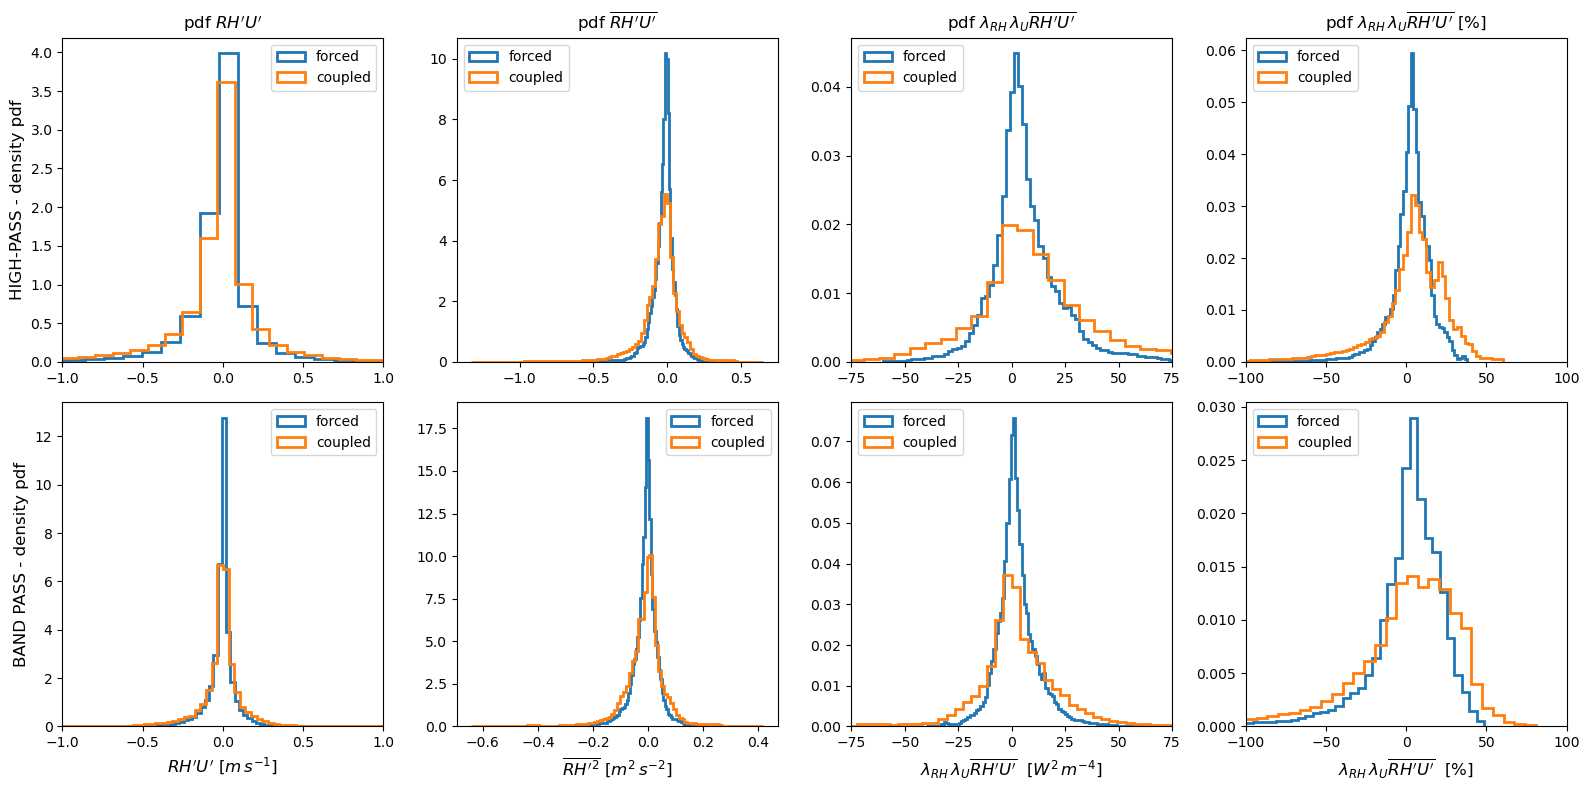

In [35]:

fig, ax =  plt.subplots(2,4, figsize=(16,8))
ax = ax.flatten()
bins = 100
# fig.suptitle('High-pass plots')

# prime = 'RH_prime'
prime_1 = 'U_prime'
prime_2 = 'RH_prime'

var_covar = 'covar_U_RH'

lambda_1 = 'lambda_U'
lambda_2 = 'lambda_RH'


############## high pass

prime_tit   = r"pdf $RH'U'$"
var_tit     = r"pdf $\overline{RH'U'}$"
weight_tit  = r"pdf $\lambda_{RH} \, \lambda_{U} \overline{RH'U'}$"
rel_tit     = r"pdf $\lambda_{RH} \, \lambda_{U} \overline{RH'U'}$ [%]"

weight_hp_cou = ds_hp_RH_cou[lambda_1]*ds_hp_RH_cou[lambda_2]*2
weight_hp_for = ds_hp_RH_for[lambda_1]*ds_hp_RH_for[lambda_2]*2

ax[0].hist((ds_hp_RH_for[prime_1]*ds_hp_RH_for[prime_2]*100).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[0].hist((ds_hp_RH_cou[prime_1]*ds_hp_RH_cou[prime_2]*100).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[0].legend()
ax[0].set_xlim(-1,1)
ax[0].set_title(prime_tit, fontsize=12)
ax[0].set_ylabel('HIGH-PASS - density pdf', fontsize=12)


ax[1].hist((ds_hp_RH_for[var_covar].values*100).flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[1].hist((ds_hp_RH_cou[var_covar].values*100).flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[1].legend()
# ax[1].set_xlim(-1,1)
ax[1].set_title(var_tit, fontsize=12)

ax[2].hist((weight_hp_for*ds_hp_RH_for[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[2].hist((weight_hp_cou*ds_hp_RH_cou[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[2].legend(loc='upper left')
ax[2].set_xlim(-75,75)
ax[2].set_title(weight_tit, fontsize=12)

ax[3].hist((100*weight_hp_for*ds_hp_RH_for[var_covar]/ds_hp_RH_for['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[3].hist((100*weight_hp_cou*ds_hp_RH_cou[var_covar]/ds_hp_RH_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[3].legend(loc='upper left')
ax[3].set_xlim(-100,100)
ax[3].set_title(rel_tit, fontsize=12)




#################### BAND PASS


weight_bp_cou = ds_bp_RH_cou[lambda_1]*ds_bp_RH_cou[lambda_2]*2
weight_bp_for = ds_bp_RH_for[lambda_1]*ds_bp_RH_for[lambda_2]*2

x_prime    = r"$RH'U'$ [$m\,s^{-1}$]"
var_lab    = r"$\overline{RH'^2}$ [$m^2\,s^{-2}$]"
weight_lab = r"$\lambda_{RH} \, \lambda_{U} \overline{RH'U'}$  $[W^2\,m^{-4}]$"
rel_lab    = r"$\lambda_{RH} \, \lambda_{U} \overline{RH'U'}$  [%]"


ax[4].hist((ds_bp_RH_for[prime_1]*ds_bp_RH_for[prime_2]*100).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[4].hist((ds_bp_RH_cou[prime_1]*ds_bp_RH_cou[prime_2]*100).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[4].legend()
ax[4].set_xlim(-1,1)
# ax[4].set_title("pdf SST'")
ax[4].set_xlabel(x_prime, fontsize=12); 
ax[4].set_ylabel('BAND PASS - density pdf', fontsize=12)


ax[5].hist((ds_bp_RH_for[var_covar]*100).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[5].hist((ds_bp_RH_cou[var_covar]*100).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[5].legend()
# ax[5].set_xlim(-0.15,0.15)
# ax[5].set_title(r"pdf $\overline{SST'^2}$")
ax[5].set_xlabel(var_lab, fontsize=12)


ax[6].hist((weight_bp_for*ds_bp_RH_for[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[6].hist((weight_bp_cou*ds_bp_RH_cou[var_covar]).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[6].legend(loc='upper left')
ax[6].set_xlim(-75,75)
# ax[6].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[6].set_xlabel(weight_lab, fontsize=12)


ax[7].hist((100*weight_bp_for*ds_bp_RH_for[var_covar]/ds_bp_RH_for['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='forced', linewidth=2)
ax[7].hist((100*weight_bp_cou*ds_bp_RH_cou[var_covar]/ds_bp_RH_cou['var_lhf']).values.flatten(),bins=bins,histtype=u'step',density=True, label='coupled', linewidth=2)
ax[7].legend(loc='upper left')
ax[7].set_xlim(-100,100)
# ax[7].set_title(r"pdf $\lambda_{SST}^2\,\overline{SST'^2}$")
ax[7].set_xlabel(rel_lab, fontsize=12)



plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/VARIANCE_LH/daily/FEB/plot_Ago/RH/anoms_vars_perc_HPBP_CouFor/all_RH_U.png')